----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
import h5py

# Open the file as read only
h5f = h5py.File('/content/drive/MyDrive/Neural/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

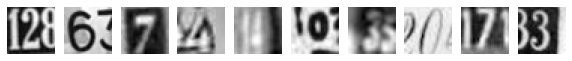

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
# Shape of the images and the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [ ]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [ ]:
#Write the function and appropriate variable name to one-hot encode the output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

def cnn_model_1():
    model = Sequential() 
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32,32,1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())   
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))
    adam = optimizers.Adamax(learning_rate=0.001)
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])
    
    return model

In [ ]:
#Build the model
model_1 = cnn_model_1()

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
history_model_1 = model_1.fit(X_train,y_train,
            epochs=20,
            batch_size=32,
            validation_split=0.2,
            verbose=2)


Epoch 1/20
1050/1050 - 16s - loss: 1.7275 - accuracy: 0.4357 - val_loss: 1.0892 - val_accuracy: 0.6786 - 16s/epoch - 15ms/step
Epoch 2/20
1050/1050 - 14s - loss: 0.8497 - accuracy: 0.7551 - val_loss: 0.7174 - val_accuracy: 0.7994 - 14s/epoch - 13ms/step
Epoch 3/20
1050/1050 - 12s - loss: 0.6501 - accuracy: 0.8115 - val_loss: 0.6404 - val_accuracy: 0.8161 - 12s/epoch - 12ms/step
Epoch 4/20
1050/1050 - 9s - loss: 0.5716 - accuracy: 0.8357 - val_loss: 0.5801 - val_accuracy: 0.8343 - 9s/epoch - 8ms/step
Epoch 5/20
1050/1050 - 9s - loss: 0.5315 - accuracy: 0.8464 - val_loss: 0.5865 - val_accuracy: 0.8352 - 9s/epoch - 9ms/step
Epoch 6/20
1050/1050 - 9s - loss: 0.4967 - accuracy: 0.8571 - val_loss: 0.5725 - val_accuracy: 0.8377 - 9s/epoch - 9ms/step
Epoch 7/20
1050/1050 - 9s - loss: 0.4744 - accuracy: 0.8639 - val_loss: 0.5272 - val_accuracy: 0.8529 - 9s/epoch - 9ms/step
Epoch 8/20
1050/1050 - 9s - loss: 0.4553 - accuracy: 0.8689 - val_loss: 0.5270 - val_accuracy: 0.8517 - 9s/epoch - 9ms/step

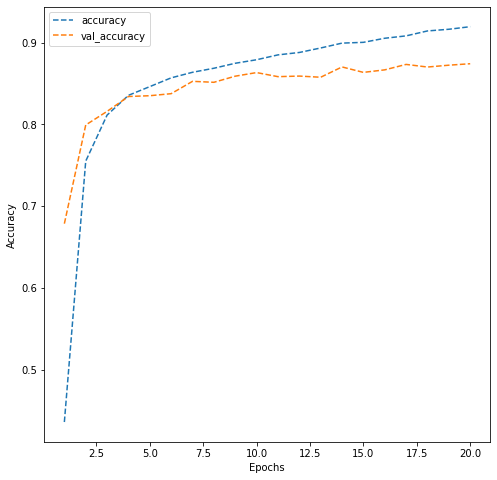

In [ ]:
# plotting the accuracies
dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- The validation accuracy is slightly lower than the training accuracy.
- The model may be overfitting on the training data.
- We can try adding a few dropout layers to reduce overfitting.


In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32,32,1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())    
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    adam = optimizers.Adamax(learning_rate=0.001)

    #compile the model
    model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model
model_2 = cnn_model_2()

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [ ]:
history_model_2 = model_2.fit(X_train,y_train,
                              epochs=30,
                              batch_size=128,
                              validation_split=0.2,
                              verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 20ms/step - loss: 2.0592 - accuracy: 0.2418 - val_loss: 2.1180 - val_accuracy: 0.6206
Epoch 2/30
263/263 [==============================] - 5s 18ms/step - loss: 1.3445 - accuracy: 0.5485 - val_loss: 1.2568 - val_accuracy: 0.7951
Epoch 3/30
263/263 [==============================] - 5s 18ms/step - loss: 0.9964 - accuracy: 0.6830 - val_loss: 0.6845 - val_accuracy: 0.8185
Epoch 4/30
263/263 [==============================] - 5s 17ms/step - loss: 0.8522 - accuracy: 0.7335 - val_loss: 0.6102 - val_accuracy: 0.8254
Epoch 5/30
263/263 [==============================] - 5s 18ms/step - loss: 0.7824 - accuracy: 0.7591 - val_loss: 0.5742 - val_accuracy: 0.8369
Epoch 6/30
263/263 [==============================] - 5s 18ms/step - loss: 0.7231 - accuracy: 0.7754 - val_loss: 0.5513 - val_accuracy: 0.8427
Epoch 7/30
263/263 [==============================] - 5s 17ms/step - loss: 0.6843 - accuracy: 0.7868 - val_loss: 0.5297 - val_accuracy: 0.8417

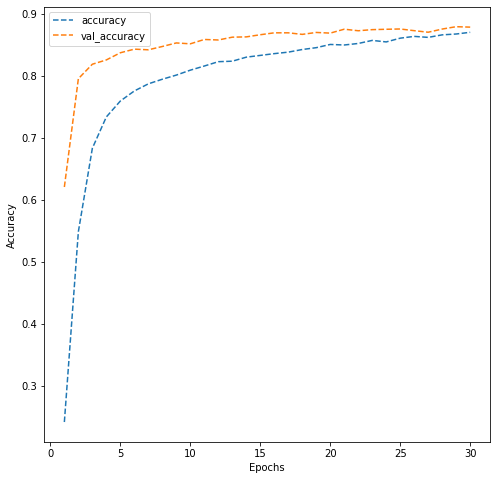

In [ ]:
# plotting the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- After adding the batch normalization and dropout layers the validation accuracy has increased.
- The validation accuracy is slightly higher than the training accuracy.
- The model is not overfitting.

In [ ]:
test_pred = model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis=-1)

In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1814
           1       0.90      0.87      0.89      1828
           2       0.88      0.90      0.89      1803
           3       0.84      0.81      0.82      1719
           4       0.90      0.89      0.89      1812
           5       0.86      0.88      0.87      1768
           6       0.83      0.87      0.85      1832
           7       0.92      0.90      0.91      1808
           8       0.83      0.84      0.83      1812
           9       0.84      0.89      0.86      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



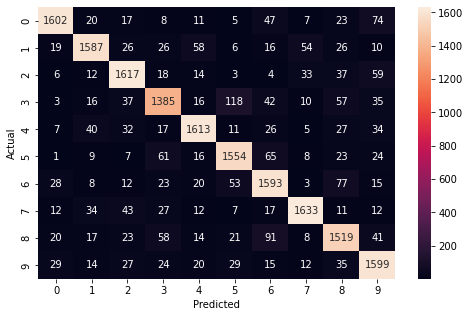

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()